In [ ]:
!pip uninstall -y torch torchvision torchaudio
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121
!pip install fsspec==2025.3.0


Found existing installation: torch 2.6.0+cu124
Uninstalling torch-2.6.0+cu124:
  Successfully uninstalled torch-2.6.0+cu124
Found existing installation: torchvision 0.21.0+cu124
Uninstalling torchvision-0.21.0+cu124:
  Successfully uninstalled torchvision-0.21.0+cu124
Found existing installation: torchaudio 2.6.0+cu124
Uninstalling torchaudio-2.6.0+cu124:
  Successfully uninstalled torchaudio-2.6.0+cu124
Looking in indexes: https://download.pytorch.org/whl/cu121
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 780.5/780.5 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 79.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 88.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 85.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 51.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 99.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/

In [ ]:
import torch
print("Torch version:", torch.__version__)
print("CUDA available:", torch.cuda.is_available())
print("CUDA device:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "No GPU found")



Torch version: 2.5.1+cu121
CUDA available: True
CUDA device: Tesla T4


In [ ]:
!pip install datasets transformers scikit-learn pandas numpy matplotlib seaborn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 19.2 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.0
    Uninstalling fsspec-2025.3.0:
      Successfully uninstalled fsspec-2025.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2024.12.0 which is incompatible.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datasets import load_dataset
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
from datasets import load_dataset
dataset = load_dataset("tyqiangz/multilingual-sentiments", "all")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

multilingual-sentiments.py:   0%|          | 0.00/6.23k [00:00<?, ?B/s]

0000.parquet:   0%|          | 0.00/37.1M [00:00<?, ?B/s]

0000.parquet:   0%|          | 0.00/1.26M [00:00<?, ?B/s]

0000.parquet:   0%|          | 0.00/1.46M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/270399 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/10857 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/14465 [00:00<?, ? examples/s]

In [ ]:
df = pd.DataFrame(dataset["train"])

In [ ]:
print(df.head())

                                                text  source language  label
0    yang memerlukan pemerhatian dan tindakan serius  malaya    malay      0
1  sentiasa memikirkan dan merancang inisiatif ba...  malaya    malay      0
2  Kita akan tengok daripada pelbagai aspek supay...  malaya    malay      0
3  justeru asean perlu mengambil tindakan sebagai...  malaya    malay      0
4  @_Niiar_ Jangan punah dulu, aku belum ke labua...  malaya    malay      1


In [ ]:
df.rename(columns={"text": "tweet", "language": "language", "label": "sentiment"}, inplace=True)

In [ ]:
sentiment_mapping = {0: "negative", 1: "neutral", 2: "positive"}
df["sentiment_label"] = df["sentiment"].map(sentiment_mapping)

In [ ]:
df.dropna(inplace=True)

In [ ]:
import re
import string

def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r"http\S+|www\S+|https\S+", "", text, flags=re.MULTILINE)  # Remove URLs
    text = re.sub(r"\@w+|\#","", text)  # Remove mentions and hashtags
    text = text.translate(str.maketrans("", "", string.punctuation))  # Remove punctuation
    return text

In [ ]:
df["clean_tweet"] = df["tweet"].apply(preprocess_text)

In [ ]:
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df["clean_tweet"])

In [ ]:
y = df["sentiment"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.4892011834319527
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.37      0.50     18665
           1       0.39      0.84      0.53     17389
           2       0.70      0.27      0.39     18026

    accuracy                           0.49     54080
   macro avg       0.62      0.49      0.47     54080
weighted avg       0.62      0.49      0.47     54080



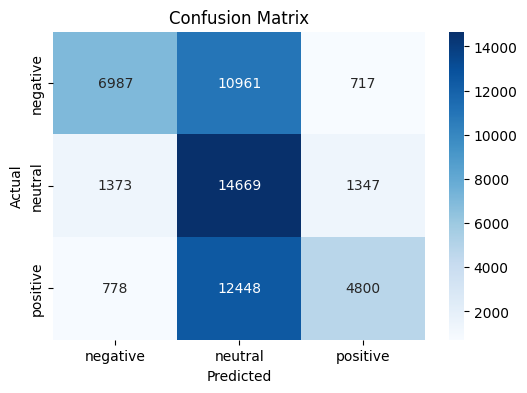

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=sentiment_mapping.values(), yticklabels=sentiment_mapping.values())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

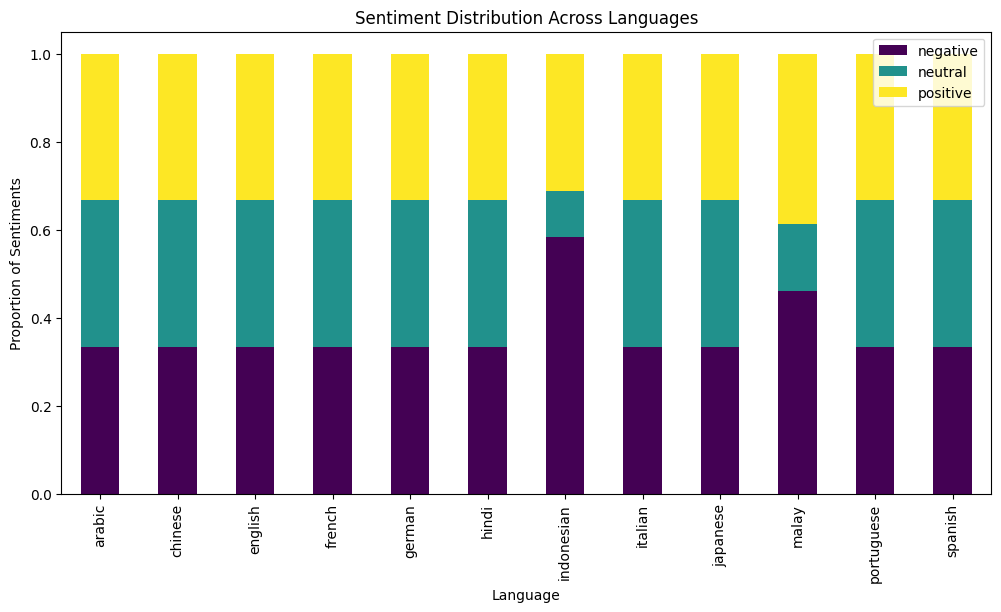

In [ ]:
bias_analysis = df.groupby("language")["sentiment"].value_counts(normalize=True).unstack()
bias_analysis.plot(kind="bar", stacked=True, figsize=(12,6), colormap="viridis")
plt.title("Sentiment Distribution Across Languages")
plt.xlabel("Language")
plt.ylabel("Proportion of Sentiments")
plt.legend(sentiment_mapping.values())
plt.show()

In [ ]:
def predict_sentiment(text):
    processed_text = preprocess_text(text)
    text_vectorized = vectorizer.transform([processed_text])
    prediction = model.predict(text_vectorized)[0]
    return sentiment_mapping[prediction]

In [ ]:
print(df["language"].value_counts())


language
japanese      120000
chinese       120000
indonesian     11000
malay           4687
german          1839
hindi           1839
italian         1839
english         1839
french          1839
portuguese      1839
spanish         1839
arabic          1839
Name: count, dtype: int64


config.json:   0%|          | 0.00/1.00k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


pytorch_model.bin:   0%|          | 0.00/329M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/294 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/329M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

Device set to use cuda:0
You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
<ipython-input-23-410a8c9a5445>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=english_df, x="predicted_emotion", palette="viridis", order=english_df["predicted_emotion"].value_counts().index)


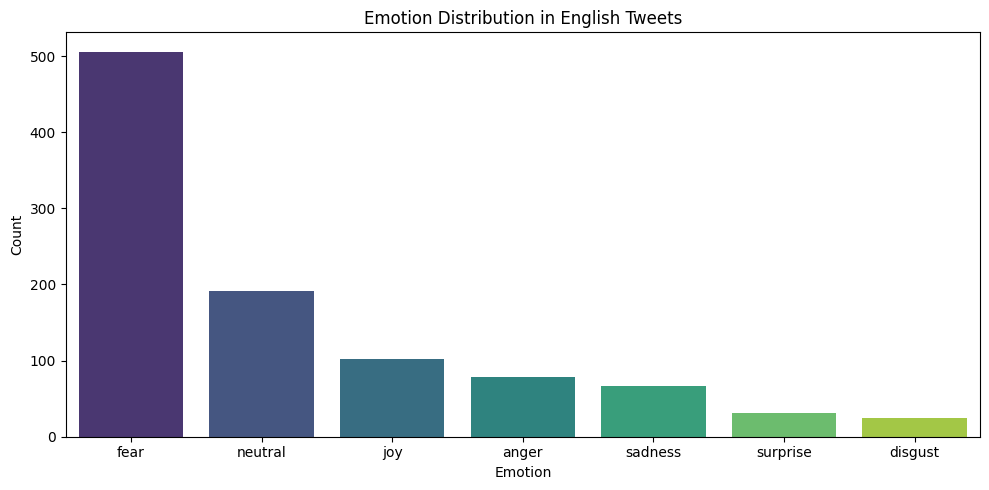

In [ ]:
from transformers import pipeline
import seaborn as sns
import matplotlib.pyplot as plt

# Filter English samples
english_df = df[df["language"] == "english"].copy()

# Load the emotion classification pipeline
emotion_classifier = pipeline("text-classification", model="j-hartmann/emotion-english-distilroberta-base", top_k=1)

# Apply emotion classifier
english_df = english_df.sample(n=1000, random_state=42)  # Limit for speed
english_df["predicted_emotion"] = english_df["tweet"].apply(lambda x: emotion_classifier(x)[0][0]["label"])

# Plot emotion distribution
plt.figure(figsize=(10, 5))
sns.countplot(data=english_df, x="predicted_emotion", palette="viridis", order=english_df["predicted_emotion"].value_counts().index)
plt.title("Emotion Distribution in English Tweets")
plt.xlabel("Emotion")
plt.ylabel("Count")
plt.tight_layout()
plt.show()
